Quer encontrar uma reta que passe por um conjunto de dados mas que não passe necessariamente por todos os pontos.

Num mundo ideal temos uma situação real que existe uma reta ou curva passando por todos os pontos, mas na hora de pegar amostras acontecem erros, distribuição normal. A ideia é pegar a que mais se encaixa, a que existem pontos fora dela com uma distância vertical até ela menor possível.

$\omega = \{(xi, ti), i = 1, ..., n\} $

Quero $ y = \beta0 + \beta1 x $ tal que $ yi \approx \beta0 + \beta1 xi $

$E(\beta0, \beta1) = \frac{1}{2} \sum_{i=1}^{n} (yi -  \beta0 - \beta1 xi)^2 $ -> y é o real, o resto é chamado de previsão (ou predito).

Tem que otimizar pra pegar o mínimo do erro $E(\beta0, \beta1)$:

$ \frac{\delta E}{\delta \beta0} (\beta) = \frac{1}{2} \sum_{i=1}^{n} 2 (yi -  \beta0 - \beta1 xi) (-1) = \sum_{i=1}^{n} 2 (\beta0 + \beta1 xi - yi) = 0 $ 

$ \frac{\delta E}{\delta \beta1} (\beta) = \frac{1}{2} \sum_{i=1}^{n} 2 (yi -  \beta0 - \beta1 x1) (-xi) = \sum_{i=1}^{n} 2 (\beta0 xi + \beta1 xi^2 - xiyi) = 0 $ 

Pode transformar em  $ M * \beta = c $, 

$$
M = \left[
\begin{array}{ccc}
\sum 1 & \sum xi \\
\sum xi  & \sum xi^2 \\
\end{array}
\right]
$$


$$
\beta = \left[
\begin{array}{ccc}
\beta0 \\
\beta1 \\ 
\end{array}
\right]
$$

$$
c = \left[
\begin{array}{ccc}
\sum yi\\
\sum xiyi \\ 
\end{array}
\right]
$$

In [107]:
using Plots
gr(size=(600,400))
plot(rand(3),rand(3))
scatter!(rand(3),rand(3))
nothing

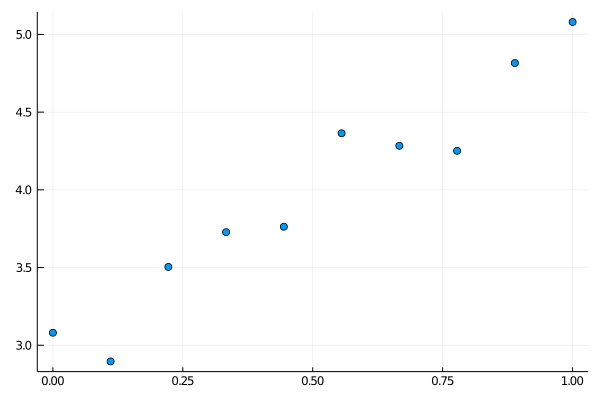

In [108]:
n = 10    #numero de pontos
x = range(0, 1, length=n)   #dominio dos pontos
y = 2x .+ 3 + randn(n) * 0.2  #a ultima soma é um erro aleatorio, se nao fosse ele daria uma reta perfeita
#randn: distribuiçao normal: vai de -inf ate +inf com uma probabilidade de dar > perto do zero
#randn * 0.2 significa que nao ta mais centrado de -1 a 1 e sim de -0.2 a 0.2, ta ligado com a variancia do erro
#rand: distribuiçao uniforme, vai de 0 a 1 com uma probabilidade igual pra tds os ptos
scatter(x, y, leg=false)

In [109]:
E(β₀, β₁) = sum((y[i] - β₀ - β₁ * x[i])^2 for i=1:n) / 2

E (generic function with 1 method)

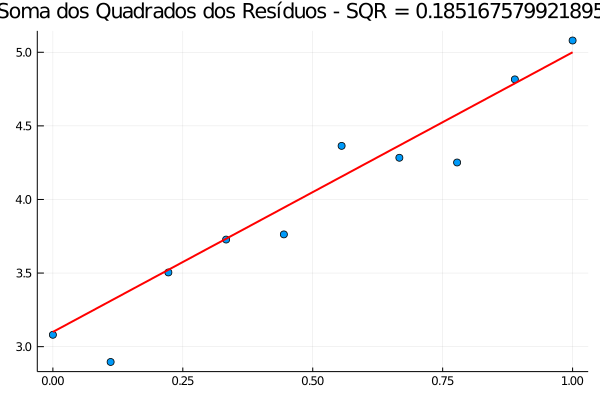

In [110]:
β₀ = 3.1   #abaixa a reta
β₁ = 1.9   #inclina a reta

scatter(x, y, leg=false)
plot!(x -> β₀ + β₁ * x, extrema(x)..., c=:red, lw=2)  
#extrema(x) retorna mín e máx, quando coloca ... expande pra 2 argumentos- intervalo (0,1)
title!("Soma dos Quadrados dos Resíduos - SQR = $(E(β₀, β₁))")

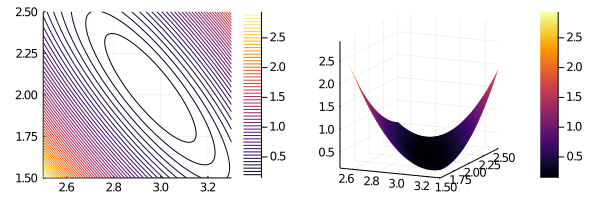

In [111]:
β₀range = range(2.5, 3.3, length=100)
β₁range = range(1.5, 2.5, length=100)
p = contour(β₀range, β₁range, E, levels=50, layout=(1,2), size=(600,200))  
#função E já tem 2 argumementos entao nao precisa ser manipulado; 50 curvas de nível 
surface!(p[2], β₀range, β₁range, E)


In [112]:
M = [n sum(x); sum(x) sum(x .^2)]
c = [sum(y); sum(x .* y)]

βsol = M \ c

2-element Array{Float64,1}:
 2.955530817429667
 2.041987831837844

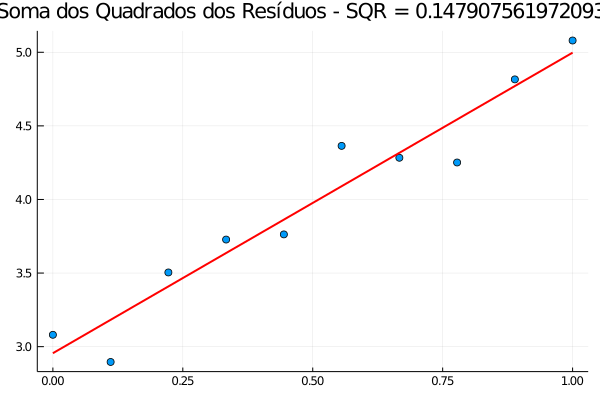

In [113]:
scatter(x, y, leg=false)
plot!(x -> βsol[1] + βsol[2] * x, extrema(x)..., c=:red, lw=2)  
title!("Soma dos Quadrados dos Resíduos - SQR = $(E(βsol[1], βsol[2]))")

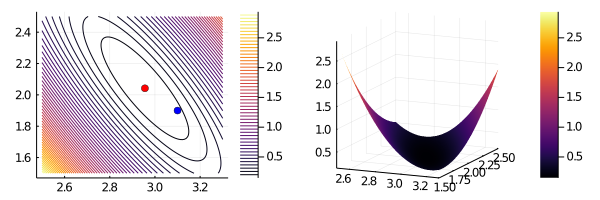

In [114]:
β₀range = range(2.5, 3.3, length=100)
β₁range = range(1.5, 2.5, length=100)
p = contour(β₀range, β₁range, E, levels=50, layout=(1,2), size=(600,200))  
scatter!(p[1], [βsol[1]], [βsol[2]], c=:red, leg=false)
scatter!(p[1], [3.1], [1.9], c=:blue, leg=false)
surface!(p[2], β₀range, β₁range, E)

#o pto vermelho é o mínimo de erro possível, é o valor de β0 e β1 q queremos chegar
#o pto azul sao os valores de beta que estou usando atualmente

Quadrados Mínimos é tudo do tipo minimizar $ \frac{1}{2}\sum($afim em $\beta)^2 $

$ y = \beta0 + \beta1 x + \beta2 x^2 $  -> linear em $\beta$

$E(\beta0, \beta1, \beta2) = \frac{1}{2} \sum_{i=1}^{n} (yi -  \beta0 - \beta1 xi - \beta2xi^2)^2 $

$ \frac{\delta E}{\delta \beta0} = 0 $

$ \frac{\delta E}{\delta \beta1} = 0 $

$ \frac{\delta E}{\delta \beta2} = 0 $

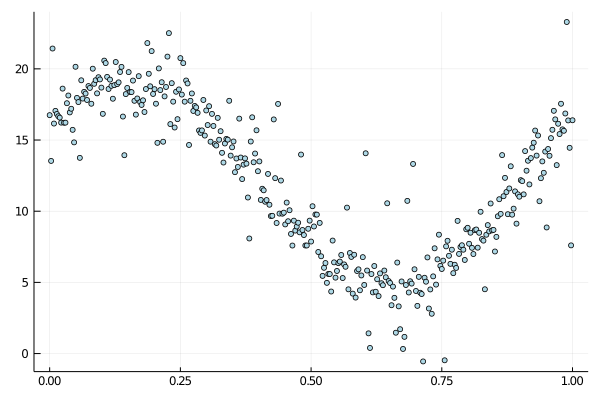

In [100]:
using Random
Random.seed!(0)  #fixa a semente de aleatoriedade

#Gerando dados fictícios para teste
n = 365
t = range(0, 1, length=n)

ϕ1(t) = sin(2π * t)
ϕ2(t) = cos(2π * t)
ϕ3(t) = 1.0

y = 6 * ϕ1.(t) + 4 * ϕ2.(t) + 12 * ϕ3.(t) + randn(n)*1.1 + [rand() < 0.2 ? randn() * 3.5 : 0.0 for i=1:n]

scatter(t, y, c=:lightblue, ms=3, leg=false)

Modelo $\approx sin(\alpha t) + cos(\alpha t) + cte $ , sendo $\alpha$ uma cte de sazonalidade

$ y = \beta1 \phi1(t) + \beta2 \phi2(t) + \beta3 \phi3(t) $

$E(\beta) = \frac{1}{2} \sum_{i=1}^{n} (yi -  h(ti))^2 $, mesma coisa de antes, mas no caso linear, $h(t) = \beta0 + \beta1 t $

$ \frac{\delta E}{\delta \beta_j} (\beta) = \frac{1}{2} \sum_{i=1}^{n} 2 (yi -  h(ti)) * \frac{\delta E}{\delta \beta_j} (-h(t)) = \sum_{i=1}^{n} (yi -  h(ti)) (-\phi_j(ti)) = \sum_{i=1}^{n} [ \sum_{k=1}^{3} (\beta_k \phi_k (ti)) - yi  \phi_k (ti)] = 0$ 

$$ M = \left[
\begin{array}{c c c}
\sum_{i=1}^{n} \phi1(ti)\phi1(ti)&\ldots& \sum_{i=1}^{n} \phi1(ti)\phi3(ti)\\
\vdots&\ddots &\vdots\\ 
\sum_{i=1}^{n} \phi3(ti)\phi1(ti)&\ldots& \sum_{i=1}^{n} \phi3(ti)\phi3(ti)
\end{array}\right]
$$

$$ c = \left[
\begin{array}{c c c}
\sum_{i=1}^{n} yi\phi1(ti)\\
\vdots\\ 
\sum_{i=1}^{n} yi\phi3(ti)
\end{array}\right]
$$

$$ M \beta = c $$

In [101]:
M = zeros(3,3)
M[1,1] = sum(ϕ1(t[i]) * ϕ1(t[i]) for i = 1:n)
M[1,2] = sum(ϕ1(t[i]) * ϕ2(t[i]) for i = 1:n)
M[1,3] = sum(ϕ1(t[i]) * ϕ3(t[i]) for i = 1:n)
M[2,1] = M[1,2]
M[2,2] = sum(ϕ2(t[i]) * ϕ2(t[i]) for i = 1:n)
M[2,3] = sum(ϕ2(t[i]) * ϕ3(t[i]) for i = 1:n)
M[3,1] = M[1,3]
M[3,2] = M[2,3]
M[3,3] = sum(ϕ3(t[i]) * ϕ3(t[i]) for i = 1:n)

c = zeros(3)
c[1] = sum(y[i] * ϕ1(t[i]) for i = 1:n)
c[2] = sum(y[i] * ϕ2(t[i]) for i = 1:n)
c[3] = sum(y[i] * ϕ3(t[i]) for i = 1:n)

β = M \ c

#tinha usado o 6, 4 e 12 pra gerar a função, entaao funciona

3-element Array{Float64,1}:
  5.916093641802321
  3.953683742081815
 12.007860790666506

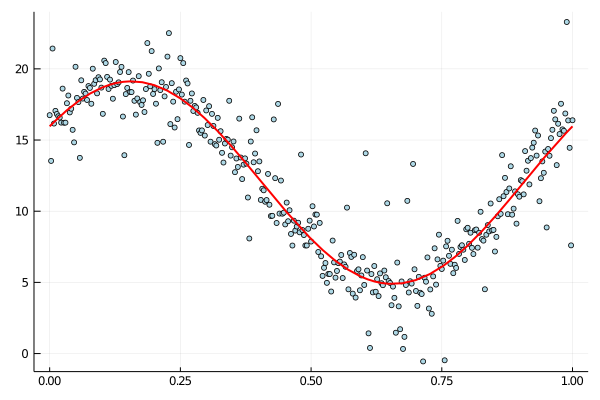

In [102]:
scatter(t, y, c=:lightblue, ms=3, leg=false)
plot!(t -> β[1] * ϕ1(t) + β[2] * ϕ2(t) + β[3] * ϕ3(t), extrema(t)..., c=:red, lw=2)  

Generalizando:

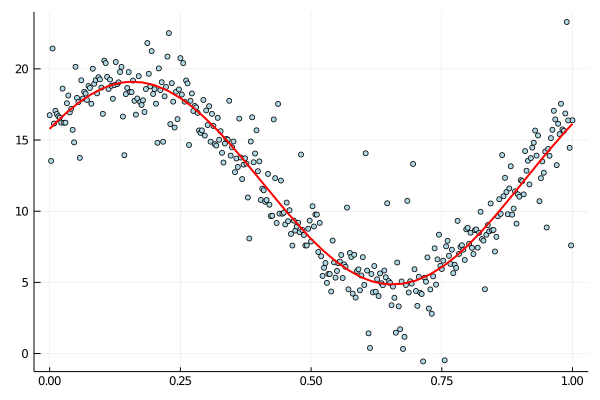

In [103]:
# F = [ϕ1, ϕ2, ϕ3, ..., ϕp]

F = [t -> sin(2π * t), t -> cos(2π * t), t -> 1.0, t  -> t]   #conjunto de funçoes
p = length(F)
M = zeros(p, p)
c = zeros(p)
for j = 1:p
    for k = 1:p
        M[j,k] = sum(F[j](t[i]) * F[k](t[i]) for i = 1:n)
    end
    c[j] = sum(y[i] * F[j](t[i]) for i = 1:n)
end

β = M \ c
h(t) = sum(F[j](t) * β[j] for j = 1:p)  #modelo

scatter(t, y, c=:lightblue, ms=3, leg=false)
plot!(h, extrema(t)..., c=:red, lw=2)

#aqui em 1 hr de video deu td errado ja

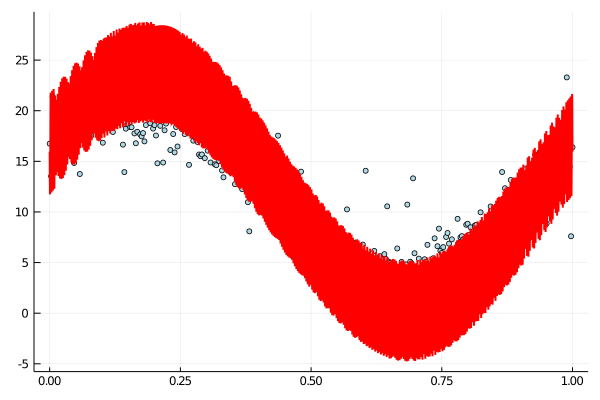

In [104]:
# F = [ϕ1, ϕ2, ϕ3, ..., ϕp]

F = [t -> sin(2π * t), t -> cos(2π * t), t -> 1.0, 
     t -> sin(365 * 2π * t), t -> cos(365 * 2π * t)]   #conjunto de funçoes
p = length(F)
M = zeros(p, p)
c = zeros(p)
for j = 1:p
    for k = 1:p
        M[j,k] = sum(F[j](t[i]) * F[k](t[i]) for i = 1:n)
    end
    c[j] = sum(y[i] * F[j](t[i]) for i = 1:n)
end

β = M \ c
h(t) = sum(F[j](t) * β[j] for j = 1:p)  #modelo

scatter(t, y, c=:lightblue, ms=3, leg=false)
plot!(h, extrema(t)..., c=:red, lw=2)

In [62]:
function quadmin(x, y, F)
    n = length(x)
    p = length(F)
    M = zeros(p, p)
    c = zeros(p)
    for j = 1:p
        for k = 1:p
            M[j,k] = sum(F[j](x[i]) * F[k](x[i]) for i = 1:n)
        end
        c[j] = sum(y[i] * F[j](x[i]) for i = 1:n)
    end

    β = M \ c
    h(x) = sum(F[j](x) * β[j] for j = 1:p) 
    return β, h
end




quadmin (generic function with 1 method)

Resíduo (vetor):

$$ r = \left[
\begin{array}{c c c}
y1 - pred1\\
\vdots\\ 
yn - predn
\end{array}\right]
$$

$ predi = \beta1 \phi1 (xi) + ... +  \beta_p \phi_p (xi) $

Soma dos Quadrados dos Resíduos: $\sum ri^2 = ||r||^2 $

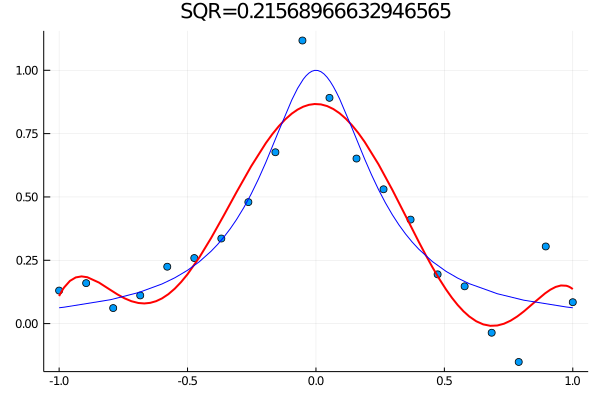

In [83]:
using LinearAlgebra, Random
Random.seed!(0)

n = 20
#se eu tenho 20 pontos, no grau 19 o erro vai pra zero, mas chega uma hr que o modelo começa a ficar mt complexo e ao mesmo tempo o erro nao diminui tanto, entao pd parar antes

x = range(-1, 1, length=n)
y = 1 ./ (1 .+ 15 * x.^2) + randn(n) * 0.1
real(x) = 1 ./ (1 .+ 15 * x.^2)

scatter(x, y, leg=false)

#F = [x -> 1.0, x -> x , x -> x^2, x -> x^3, x -> x^4, x -> x^5, x -> x^6, x -> x^7, x -> x^8, x -> x^10, x -> x^12] 
#os dados sao simétricos entao melhora quando coloca grau par, impar nao faz diferença
F = [x -> x^j for j = 0:6]
#quando aumenta o grau do polinomio melhora no meio mas piora nas pontas - fenomeno de Rouge ou overfit
β, modelo = quadmin(x,y,F)
r = y - modelo.(x)
SQR = norm(r)^2
plot!(modelo, extrema(x)..., c=:red, lw=2)
plot!(real, extrema(x)..., c=:blue)
title!("SQR=$SQR")


$ \{xi, yi, i = 1, ..., n\} $

Modelo: $ \beta1 \phi1 (x) + ... + \beta_p \phi_p (x) = \sum_{j=1}^{p} \beta_j \phi_j (x) $

$ \beta \in R^p, \phi: R -> R^p = \beta^T \phi(x) $

$ r = \left[
\begin{array}{c c c}
y1 - \beta1 \phi1 (xi) + ... +  \beta_p \phi_p (xi)\\
\vdots\\ 
yn - \beta1 \phi1 (xi) + ... +  \beta_p \phi_p (xn)
\end{array}\right]
= \left[
\begin{array}{c c c}
y1 \\
\vdots\\ 
yn 
\end{array}\right]
- \left[
\begin{array}{c c c}
\beta1 \phi1 (xi) + ... +  \beta_p \phi_p (xi)\\
\vdots\\ 
\beta1 \phi1 (xi) + ... +  \beta_p \phi_p (xn)
\end{array}\right]
= \left[
\begin{array}{c c c}
y
\end{array}\right]
- \left[
\begin{array}{c c c}
\phi1 (xi) + ... +  \phi_p (xi)\\
\vdots\\ 
\phi1 (xi) + ... +  \phi_p (xn)
\end{array}\right]
= y - F \beta
$

minimização de $\beta $ em $ \frac{1}{2} ||r||^2 = \frac{1}{2} ||y - F\beta||^2 $ , $F\beta \in $ a Imagem da matriz F, está projetando y na Imagem da F.

$ F^T F \beta = F^T y $ -> $ M \beta = c $ : Equações Normais

## Aula 13 - Mínimos Quadrados Não Lineares

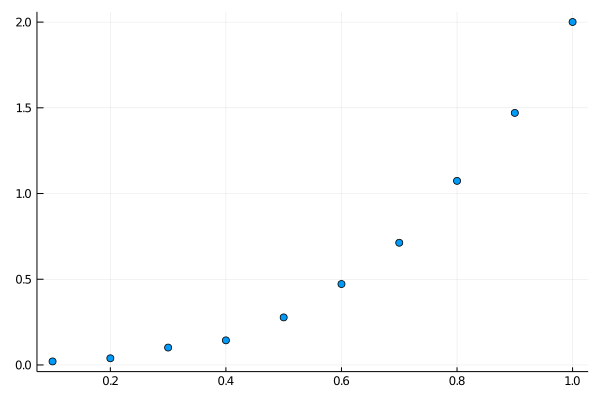

In [150]:
n = 10    
x = range(0.1, 1, length=n) 
y = 2*x.^3 + 0.05*rand(n)
scatter(x, y, leg=false)

In [151]:
#transformaçao dos dados
#dicionario

ybar = [log(y[i]) for i=1:n]
xbar = [log(x[i]) for i=1:n]


10-element Array{Float64,1}:
 -2.3025850929940455 
 -1.6094379124341003 
 -1.2039728043259361 
 -0.916290731874155  
 -0.6931471805599453 
 -0.5108256237659907 
 -0.35667494393873245
 -0.2231435513142097 
 -0.10536051565782628
  0.0                

In [152]:
#Mínimos quadrados resolvendo o sistema no mundo barra

M = [n sum(xbar); sum(xbar) sum(xbar .^2)]
c = [sum(ybar); sum(xbar .* ybar)]
βsol_bar = M \ c

2-element Array{Float64,1}:
 0.391776268796308 
 2.0829631658015058

In [155]:
#Levar de volta para o mundo original

βsol1 = exp(βsol_bar[1])
βsol2 = βsol_bar[2]


2.0829631658015058

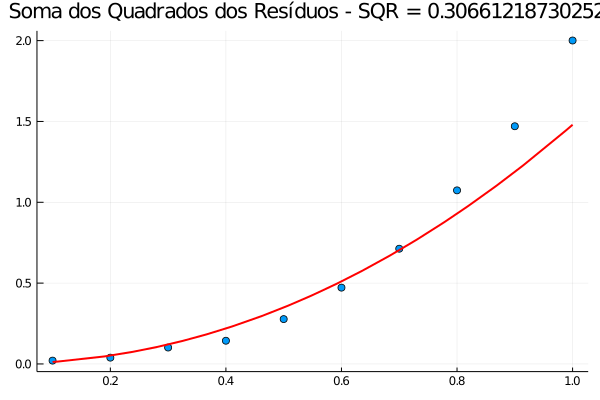

In [156]:
scatter(x, y, leg=false)
plot!(x -> βsol1 * x^βsol2 , extrema(x)..., c=:red, lw=2)  
title!("Soma dos Quadrados dos Resíduos - SQR = $(E(βsol[1], βsol[2]))")

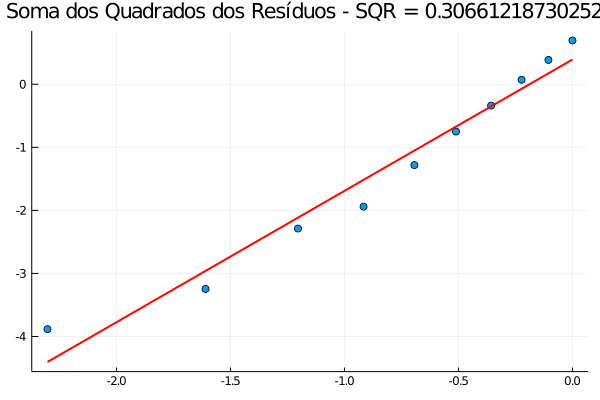

In [159]:
#Plotar no mundo barra

scatter(xbar, ybar, leg=false)
plot!(xbar -> βsol_bar[1] + βsol_bar[2] * xbar , extrema(xbar)..., c=:red, lw=2)  
title!("Soma dos Quadrados dos Resíduos - SQR = $(E(βsol[1], βsol[2]))")

**Exemplo com exponencial:**

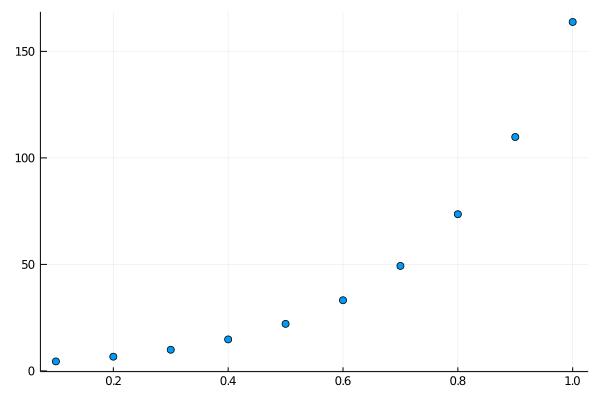

In [162]:
n = 10    
x = range(0.1, 1, length=n) 
y = 3 * exp.(4*x) + 0.05*randn(n)
scatter(x, y, leg=false)

In [163]:
#agora só o y vai pra ln, o x nao
ybar = [log(y[i]) for i=1:n]
xbar = [(x[i]) for i=1:n]

10-element Array{Float64,1}:
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

In [164]:
M = [n sum(xbar); sum(xbar) sum(xbar .^2)]
c = [sum(ybar); sum(xbar .* ybar)]
βsol_bar = M \ c

2-element Array{Float64,1}:
 1.0962546648916482
 4.002570196669611 

In [165]:
βsol1 = exp(βsol_bar[1])
βsol2 = βsol_bar[2]

4.002570196669611

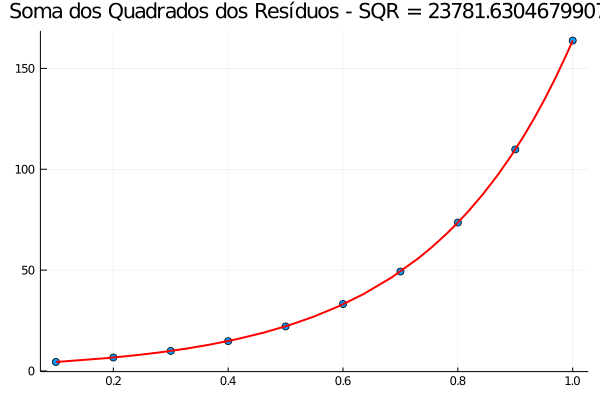

In [167]:
scatter(x, y, leg=false)
plot!(x -> βsol1 * exp(βsol2 * x) , extrema(x)..., c=:red, lw=2)  
title!("Soma dos Quadrados dos Resíduos - SQR = $(E(βsol[1], βsol[2]))")

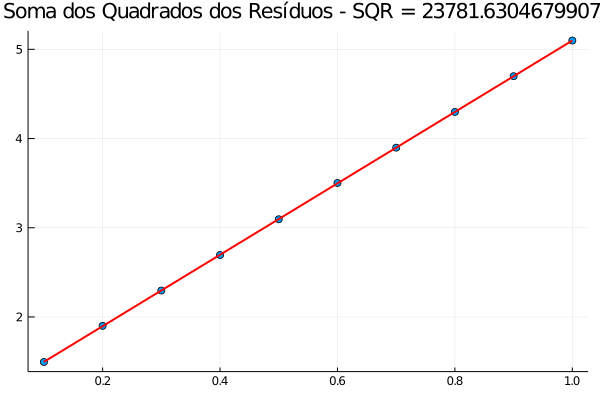

In [169]:
scatter(xbar, ybar, leg=false)
plot!(xbar -> βsol_bar[1] + βsol_bar[2] * xbar , extrema(xbar)..., c=:red, lw=2)  
title!("Soma dos Quadrados dos Resíduos - SQR = $(E(βsol[1], βsol[2]))")

## Exercício

$ T = (37 - 20) e^{-kt} + 20 $ -> $ T = 17 * e^{-kt} + 20 $ -> $ ln(T - 20) = ln(17) + (-k * t)  $ 

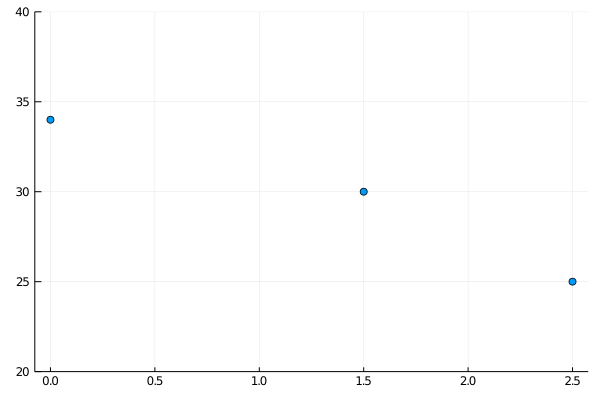

In [420]:

T = [34, 30, 25]
t = [0, 1.5, 2.5]

T0 = 34
Tf = 20
#T = (T0 - Tf) * exp.(-k * t) .+ Tf
scatter(t, T, leg=false, ylims=(20,40))

In [416]:
n = 3
Tbar = -log.((T .- 20)./14)
tbar = [(t[i]) for i=1:n]

3-element Array{Float64,1}:
 0.0
 1.5
 2.5

In [417]:
M = [n sum(tbar); sum(tbar) sum(tbar .^2)]
c = [sum(Tbar); sum(tbar .* Tbar)]
βsol_bar = M \ c

2-element Array{Float64,1}:
 -0.07402616149670593
  0.39704253457312216

In [418]:
#βsol1 = exp(βsol_bar[1])
#βsol2 = exp(βsol_bar[2])
k = βsol_bar[2]

0.39704253457312216

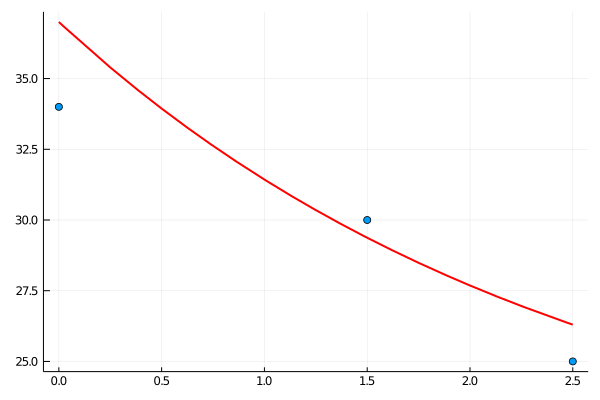

In [419]:
scatter(t, T, leg=false)
plot!(t -> 17 * exp.(-k * t) .+ 20, extrema(t)..., c=:red, lw=2)  


In [394]:
37 = 14 * exp(-k * t) + 20

ErrorException: syntax: invalid assignment location "37"

In [411]:
17 = 14*exp(- 0.39704253457312555*t)

ErrorException: syntax: invalid assignment location "17"

In [422]:
a = log(17/14)

0.1941560144409574

In [424]:
b = -(a/0.39704253457312555)

-0.4890055788347749

A resposta de -0.5 significa meia hr antes de 15 hrs, ou seja, 14:30.